In this exercise we will train a simple Q-network in TensorFlow to solve Tic Tac Toe.

In [ ]:
import random
import collections
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

Hopefully everyone has played Tic Tac Toe at some point. Here is a [reminder](https://en.wikipedia.org/wiki/Tic-tac-toe). Let us set up some helper functions to define the game itself. The typical board size is 3x3 but we will be general.

In [ ]:
def new_board(size):
    return np.zeros(shape=(size, size))

In [ ]:
def available_moves(board):
  #  return a list of position that is aviable for next move. eg:
  #  [[1 0]
  #  [1 2]
  #  [2 0]]
    return np.argwhere(board == 0)  


In [ ]:
def check_game_end(board):
    best = max(list(board.sum(axis=0)) +    # columns
               list(board.sum(axis=1)) +    # rows
               [board.trace()] +            # main diagonal
               [np.fliplr(board).trace()],  # other diagonal
               key=abs)
    if abs(best) == board.shape[0]: 
        return np.sign(best)  # winning player, +1 or -1
    if available_moves(board).size == 0:
        return 0  # a draw (otherwise, return None by default)

Now, let's define our players. We will define three types of bots. A *random* player picks a random position in the board each move.

In [ ]:
class Player():
    def new_game(self):
        pass
    def reward(self, value):
        pass

class RandomPlayer(Player):
    def move(self, board):
        # print(available_moves(board)) 
        # print(random.choice(available_moves(board)))  # the move is in [x y] format. eg. [1 2]
        return random.choice(available_moves(board))

A *boring* player always picks the *first* available position on the board.

In [ ]:
class BoringPlayer(Player):
    def move(self, board):
        return available_moves(board)[0]

We can simulate games by playing one bot vs another. The starting player is labeled +1.

In [ ]:
def play(board, player_objs):
    for player in [+1, -1]:
        player_objs[player].new_game()
    player = +1
    game_end = check_game_end(board)  
    while game_end is None:
        move = player_objs[player].move(board)
        board[tuple(move)] = player
        game_end = check_game_end(board)
        player *= -1  # switch players
    for player in [+1, -1]:
        # the reward for wins is +1, and -1 for draws/losses
        reward_value = +1 if player == game_end else -1
        player_objs[player].reward(reward_value)
    return game_end # return the winner 

Player1 won 1194 times
Player2 won 564 times
Draw 242 times


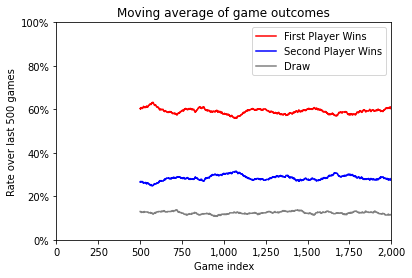

In [ ]:
# 3x3, random vs. random
random.seed(1)

# TODO Q1. Play 2000 games between two bots, both of them random players.
player1 = RandomPlayer()
player2 = RandomPlayer() 
player_objs = {}
player_objs[+1] = player1
player_objs[-1] = player2
# print(player_objs[+1])
player1_win_cnt = 0
player2_win_cnt = 0
draw_cnt = 0

game_res = []
for i in range(2000):
  winner = play(new_board(3),player_objs) # the board size is 3x3
  # print(winner)
  game_res.append(winner)
  if winner == 1.0:
    player1_win_cnt += 1
  elif winner == -1.0:
    player2_win_cnt += 1
  else:
    draw_cnt += 1
# Print the number of wins by Player 1, number of wins by Player 2, and draws.
print('Player1 won ' + str(player1_win_cnt) + ' times')
print('Player2 won ' + str(player2_win_cnt) + ' times')
print('Draw ' + str(draw_cnt) + ' times')

# Plot (as a function of game index) the moving average of game outcomes
# over a window of size 500. 
# You might find the following functions helpful for plotting.
show(game_res)

In [ ]:
def moving(data, size, value=+1):
    binary_data = [x == value for x in data]
    return [sum(binary_data[i-size:i])/size for i in range(size, len(data) + 1)]

def show(results, size=500, title='Moving average of game outcomes',
         first_label='First Player Wins', second_label='Second Player Wins', draw_label='Draw'):
    x_values = range(size, len(results) + 1)
    first = moving(results, value=+1, size=size)
    second = moving(results, value=-1, size=size)
    draw = moving(results, value=0, size=size)
    first, = plt.plot(x_values, first, color='red', label=first_label)
    second, = plt.plot(x_values, second, color='blue', label=second_label)
    draw, = plt.plot(x_values, draw, color='grey', label=draw_label)
    plt.xlim([0, len(results)])
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend(handles=[first, second, draw], loc='best')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.ylabel(f'Rate over last {size} games')
    plt.xlabel('Game index')
    plt.show()

Player1 won 1033 times
Player2 won 891 times
Draw 76 times


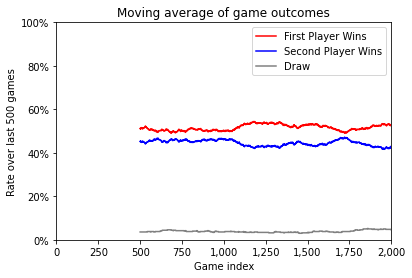

In [ ]:
# 3x3, random vs. boring

# TODO Q2. Play 2000 games between two bots, where Player 1 is Random and Player 2 is Boring.
random.seed(2)

player1 = RandomPlayer()
player2 = BoringPlayer() 
player_objs = {}
player_objs[+1] = player1
player_objs[-1] = player2
# print(player_objs[+1])
player1_win_cnt = 0
player2_win_cnt = 0
draw_cnt = 0

game_res = []
for i in range(2000):
  winner = play(new_board(3),player_objs) # the board size is 3x3
  # print(winner)
  game_res.append(winner)
  if winner == 1.0:
    player1_win_cnt += 1
  elif winner == -1.0:
    player2_win_cnt += 1
  else:
    draw_cnt += 1
# Print the number of wins by Player 1, number of wins by Player 2, and draws.
print('Player1 won ' + str(player1_win_cnt) + ' times')
print('Player2 won ' + str(player2_win_cnt) + ' times')
print('Draw ' + str(draw_cnt) + ' times')
# Plot (as a function of game index) the moving average of game outcomes.
show(game_res)
# Comment on the results, and speculate on why this might be happening.

**COMMENT**: As we can see from the above results, we knows that: 

1.   In both cases, the first player has higher rate than the second player. The player that goes first will win about twice as often as the player that goes second. To some extent, this makes sense. There are only nine squares on a Tic-Tac-Toe board, the first player will get five of them but the second player will only get four.
2.   When change the second player from RandomPlayer to BoringPlayer, the win rate increases, and the draw time decrease, which means that the strategy of always picking the *first* available position on the board is better than picking a *random* position in the board each move, when the opponent is a RandomPlayer. The reason of this might be that the strategy of RandomPlayer, chosing the move from left to right, from top to bottom, is more likely to block opponent's winning path (three of their marks in a horizontal, vertical, or diagonal row is the winner) and more likely to fill the first row and win the game, if the RandomPlayer doesn't fill the place in the first row in the first three steps.


We will now use Q-learning using a neural network to train an RL agent. 

The Q-function will be parametrically represented via a very simple single layer with linear activations (essentially, a linear model).

Complete the Q-learning part in the code snippet below.



In [ ]:
class Agent(Player):
    # Define single layer model, MSE loss, and SGD optimizer
    def __init__(self, size, seed):
        # self.decay_factor = decay_factor # I added a decay_factor for calculating the Q-values
        self.size = size
        self.training = True
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(
            size**2,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)))
        self.model.compile(optimizer='sgd', loss='mean_squared_error')

    # Helper function to predict the Q-function
    def predict_q(self, board):
        return self.model.predict(
            np.array([board.ravel()])).reshape(self.size, self.size)

    # Helper function to train the network
    def fit_q(self, board, q_values):
        self.model.fit(
            np.array([board.ravel()]), np.array([q_values.ravel()]), verbose=0)

    # The agent preserves history, which is reset when a new game starts.
    def new_game(self):
        self.last_move = None
        self.board_history = []
        self.q_history = []

    # TODO Q3: Implement the "move" method below.
    # The "move" method should use the output of the Q-network
    # to pick the next best move.
    # Make sure you are only picking "legal" moves. 

    # After picking the move, we call the reward method.

    def move(self, board):
        # ... COMPLETE THIS
        q_values = self.predict_q(board)
        # print('prediction of q table :')
        # print(q_values)

        available_moves_thistime = available_moves(board)

        move_options = []
        move = available_moves_thistime[0]
        move_options.append(move)
        # print('the available moves: ')
        # print(available_moves_thistime)

        # find the best move in available moves
        for x, y in available_moves_thistime:
            if q_values[x][y] > q_values[move[0]][move[1]]:
              move = [x, y]
              move_options = []
              move_options.append(move)
            elif ( q_values[x][y] == q_values[move[0]][move[1]] and move[0] != x and move[1] != y ) :
              move_options.append([x, y])
            else:
              continue


        # when there are multiple best available moves, randomly pick one
        if len(move_options) > 1:
          move = random.choice(move_options)
        # print('all the move options: ')
        # print(move_options)
        # print('the selected move: ')
        # print(move)

        # update the reward with Bellman update

        # last_q_value = 0
        # # use the q-value of our move in last round as the reward we already got
        # if self.last_move is not None:
        #   last_q_value = self.q_history[-1][self.last_move]
        # value = last_q_value + self.decay_factor * q_values[x][y]
        
        value = q_values[move[0]][move[1]]
        
        if self.last_move is not None:
            self.reward(value)

        self.board_history.append(board.copy())
        # here we just append the predited q value table without the updated Q_value
        # the reason why is that we can find the q-value of our move in last round 
        # and use it as the reward we already got, which brings convience for doing Bellman equation
        self.q_history.append(q_values)
        # update the last move as the move we just chose
        self.last_move = move
        return move

    # The reward method trains the Q-network, updating the Q-values with 
    # a new estimate for the last move. This is the Bellman update.
    def reward(self, reward_value):
        if not self.training:
            return
        new_q = self.q_history[-1].copy()
        new_q[self.last_move] = reward_value
        self.fit_q(self.board_history[-1], new_q)

Player1 won 1409 times
Player2 won 429 times
Draw 162 times


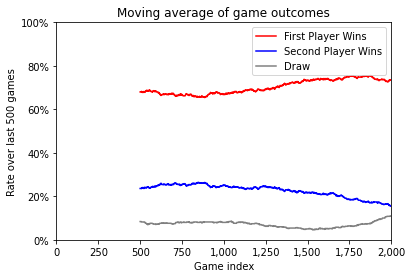

In [ ]:
# 3x3, q-learning vs. random

# TODO Q4. Play 2000 games, where Player 1 is a Q-network and Player 2 is Random.
random.seed(3)
# player1 = Agent(size=3,seed=random.seed(1), decay_factor = 0.01)
player1 = Agent(size=3,seed=3)
player2 = RandomPlayer() 
player_objs = {}
player_objs[+1] = player1
player_objs[-1] = player2
# print(player_objs[+1])
player1_win_cnt = 0
player2_win_cnt = 0
draw_cnt = 0

game_res = []
for i in range(2000):
  winner = play(new_board(3),player_objs) # the board size is 3x3
  # print(winner)
  game_res.append(winner)
  if winner == 1.0:
    player1_win_cnt += 1
  elif winner == -1.0:
    player2_win_cnt += 1
  else:
    draw_cnt += 1

# Print the number of wins by Player 1, number of wins by Player 2, and draws.
print('Player1 won ' + str(player1_win_cnt) + ' times')
print('Player2 won ' + str(player2_win_cnt) + ' times')
print('Draw ' + str(draw_cnt) + ' times')
# Plot (as a function of game index) the moving average of game outcomes.
show(game_res)

**COMMENT**: As we can see from the above result, we knows that as the Agent played more and more times, the win rate of Agent is getting higher and higher, which means that it learned the strategy of how to win the RandomPlayer and it know how to play with experience.